In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('WELFake_Dataset.csv')

In [3]:
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [5]:
df = df.drop('Unnamed: 0', axis = 1)

In [6]:
columns_to_dropna = ['title', 'text']
df.dropna(subset=columns_to_dropna, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71537 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71537 non-null  object
 1   text    71537 non-null  object
 2   label   71537 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.2+ MB


<AxesSubplot:xlabel='label', ylabel='count'>

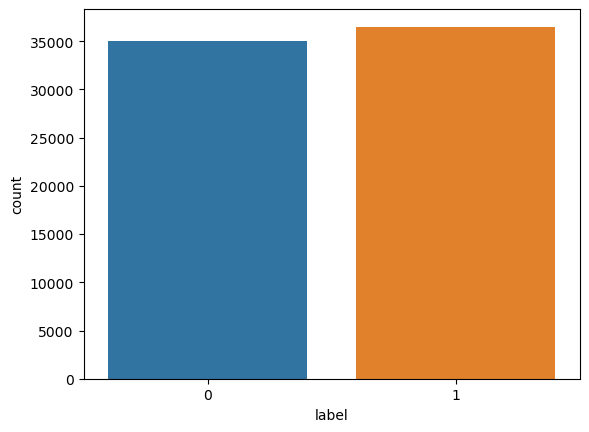

In [8]:
sns.countplot(data = df, x = 'label')

In [9]:
X = df['text']
X

0        No comment is expected from Barack Obama Membe...
2         Now, most of the demonstrators gathered last ...
3        A dozen politically active pastors came here f...
4        The RS-28 Sarmat missile, dubbed Satan 2, will...
5        All we can say on this one is it s about time ...
                               ...                        
72129    WASHINGTON (Reuters) - Hackers believed to be ...
72130    You know, because in fantasyland Republicans n...
72131    Migrants Refuse To Leave Train At Refugee Camp...
72132    MEXICO CITY (Reuters) - Donald Trump’s combati...
72133    Goldman Sachs Endorses Hillary Clinton For Pre...
Name: text, Length: 71537, dtype: object

In [10]:
y = df['label']
y

0        1
2        1
3        0
4        1
5        1
        ..
72129    0
72130    1
72131    0
72132    0
72133    1
Name: label, Length: 71537, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
tfidf = TfidfVectorizer(stop_words = 'english')

In [15]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [16]:
X_train_tfidf = tfidf.transform(X_train)

In [17]:
X_test_tfidf = tfidf.transform(X_test)

In [18]:
X_train_tfidf

<50075x206833 sparse matrix of type '<class 'numpy.float64'>'
	with 9747314 stored elements in Compressed Sparse Row format>

In [19]:
X_test_tfidf

<21462x206833 sparse matrix of type '<class 'numpy.float64'>'
	with 4114215 stored elements in Compressed Sparse Row format>

In [20]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [21]:
print(X_train_tfidf.shape)
print(y_train.shape)

(50075, 206833)
(50075,)


In [22]:
type(X_train)

pandas.core.series.Series

In [23]:
type(y_train)

pandas.core.series.Series

In [24]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter = 1000)
log_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [25]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train_tfidf, y_train)

LinearSVC()

In [26]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [27]:
def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test, preds))
    plot_confusion_matrix(model, X_test_tfidf, y_test)

              precision    recall  f1-score   support

           0       0.86      0.87      0.86     10595
           1       0.87      0.86      0.87     10867

    accuracy                           0.87     21462
   macro avg       0.87      0.87      0.87     21462
weighted avg       0.87      0.87      0.87     21462



C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


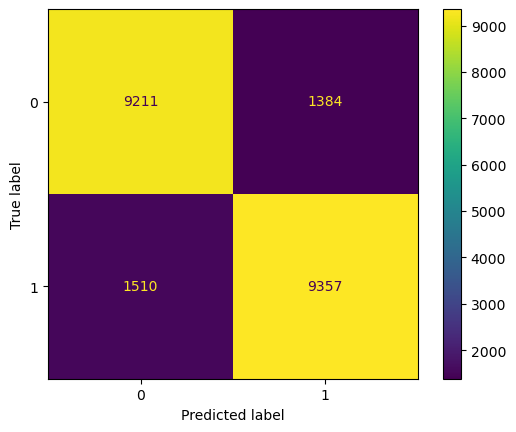

In [28]:
report(nb)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     10595
           1       0.93      0.95      0.94     10867

    accuracy                           0.94     21462
   macro avg       0.94      0.94      0.94     21462
weighted avg       0.94      0.94      0.94     21462



C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


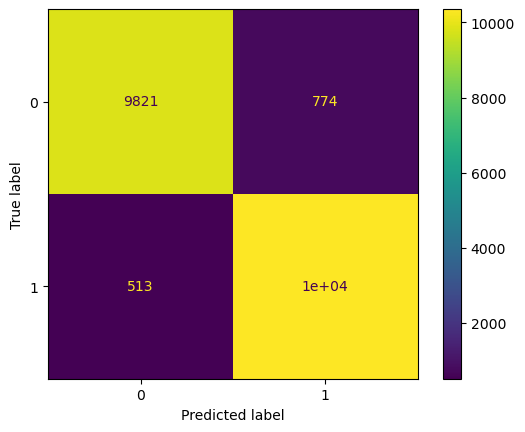

In [29]:
report(log_model)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     10595
           1       0.95      0.97      0.96     10867

    accuracy                           0.96     21462
   macro avg       0.96      0.96      0.96     21462
weighted avg       0.96      0.96      0.96     21462



C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


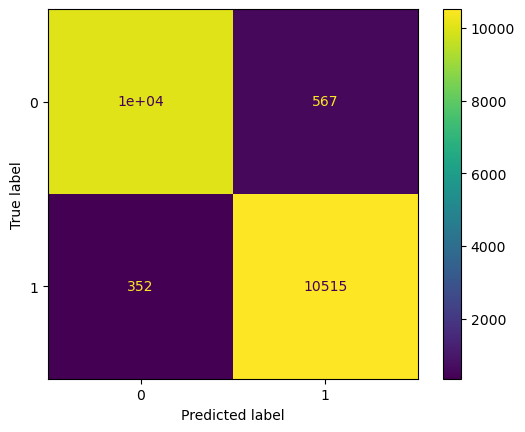

In [30]:
report(linear_svc)

<i> So, we choose Linear SVC because the accuracy is the highest! </i>

In [31]:
from sklearn.pipeline import Pipeline

In [32]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                ('svc', LinearSVC())])

In [33]:
pipe.fit(X,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

<b>
1 = Real News <br>
2 = Fake News
</b>

In [34]:
pipe.predict(['I read the news yesterday'])

array([1], dtype=int64)

In [53]:
pipe.predict(['The ceremony was opened'])

array([0], dtype=int64)